<a href="https://colab.research.google.com/github/Jit562/Yellow_Taxi_Trip_Data_Ananlysis/blob/main/Yellow_Taxi_Trip_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/2020_Yellow_Taxi_Trip_Data.csv')

In [ ]:
df.isnull().sum()

VendorID                 142900
tpep_pickup_datetime          4
tpep_dropoff_datetime         4
passenger_count          142904
trip_distance                 4
RatecodeID               142904
store_and_fwd_flag       142904
PULocationID                  4
DOLocationID                  4
payment_type             142904
fare_amount                   4
extra                         4
mta_tax                       5
tip_amount                    5
tolls_amount                  5
improvement_surcharge         5
total_amount                  5
congestion_surcharge          5
dtype: int64

In [ ]:
df.shape

(13214569, 18)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [ ]:
# Convert datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [ ]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Remove Am & Pm in datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.strftime('%m/%d/%Y %H:%M:%S')


In [ ]:
# Remove Am & Pm in datetime
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.strftime('%m/%d/%Y %H:%M:%S')

In [ ]:
# Covert datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
# Covert datetime

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Find the Duration
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [ ]:
# Convert the duration in minutes
df['duration'] = (df['duration'].dt.total_seconds()/60).round(2)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.80
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.42
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.18
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.85
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.30


In [ ]:
# Filter data as per requirement
df1 = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]

In [ ]:
df1.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.80
1,1.0,1.2,1.0,7.0,7.42
2,1.0,0.6,1.0,6.0,6.18
3,1.0,0.8,1.0,5.5,4.85
4,1.0,0.0,2.0,3.5,2.30


In [ ]:
df1.isnull().sum()

passenger_count    142904
trip_distance           4
payment_type       142904
fare_amount             4
duration                4
dtype: int64

In [ ]:
# Find the Missing data in percentage
(142904/len(df1))*100

1.081412492530025

In [ ]:
# Drop Null value
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [ ]:
df1.shape

(13071665, 5)

In [ ]:
# Convert Float to integer
df1['passenger_count'] = df1['passenger_count'].astype(np.int64)

In [ ]:
# Convert Float to integer
df1['payment_type'] = df1['payment_type'].astype(np.int64)

In [ ]:
df1.duplicated().sum()

7937469

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(5134196, 5)

In [ ]:
# find the frequency in percentage
df1['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.565089
2    0.191668
3    0.070115
5    0.067128
6    0.043327
4    0.038968
0    0.023681
7    0.000011
8    0.000007
9    0.000006
Name: proportion, dtype: float64

In [ ]:
df1['payment_type'].value_counts(normalize=True)

payment_type
1    6.738582e-01
2    3.099295e-01
3    9.783226e-03
4    6.428855e-03
5    1.947725e-07
Name: proportion, dtype: float64

In [ ]:
# Payment type data filter only 1,2
df1 = df1[df1['payment_type']<3]

In [ ]:
# passenger_count data filter only 1 to 6
df1 = df1[(df1['passenger_count'] >0) & (df1['passenger_count']<7)]

In [ ]:
df1.shape

(4933759, 5)

In [ ]:
df1['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [ ]:
df1.describe()

,passenger_count,trip_distance,fare_amount,duration
count,4.933759e+06,4.933759e+06,4.933759e+06,4.933759e+06
mean,1.965149e+00,4.917149e+00,1.900997e+01,2.660255e+01
std,1.467775e+00,5.078690e+00,1.538271e+01,1.004442e+02
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-9.990670e+03
25%,1.000000e+00,1.630000e+00,9.500000e+00,1.077000e+01
50%,1.000000e+00,3.050000e+00,1.450000e+01,1.707000e+01
75%,2.000000e+00,6.200000e+00,2.300000e+01,2.517000e+01
max,6.000000e+00,3.699400e+02,4.265000e+03,8.525120e+03


In [ ]:
# Remove the negative values
df1 = df1[df1['trip_distance']>0]
df1 = df1[df1['fare_amount']>0]
df1 = df1[df1['duration']>0]

In [ ]:
df1.describe()

,passenger_count,trip_distance,fare_amount,duration
count,4.880366e+06,4.880366e+06,4.880366e+06,4.880366e+06
mean,1.971766e+00,4.964885e+00,1.890068e+01,2.665916e+01
std,1.471470e+00,5.078908e+00,1.481861e+01,1.005528e+02
min,1.000000e+00,1.000000e-02,1.000000e-02,2.000000e-02
25%,1.000000e+00,1.670000e+00,9.500000e+00,1.085000e+01
50%,1.000000e+00,3.090000e+00,1.450000e+01,1.708000e+01
75%,2.000000e+00,6.240000e+00,2.300000e+01,2.513000e+01
max,6.000000e+00,3.699400e+02,4.265000e+03,8.525120e+03


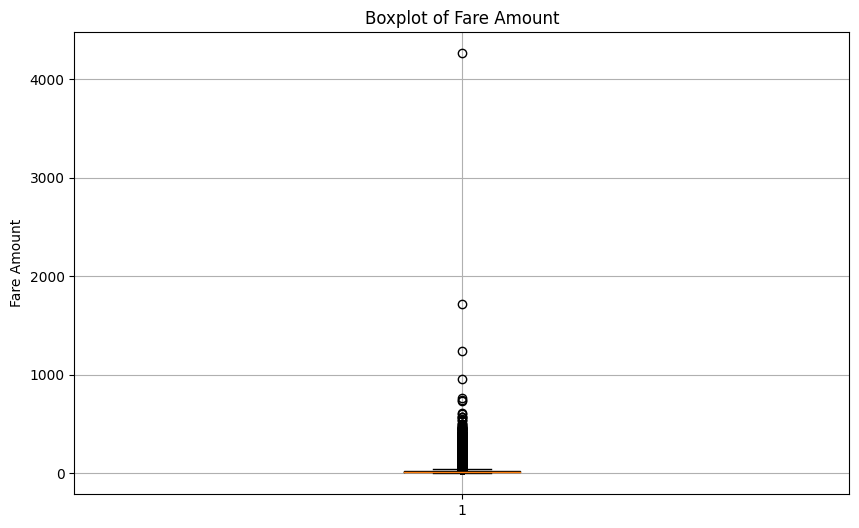

In [ ]:
# Check the outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df1['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount')
plt.grid(True)  # Optional: to add a grid for better readability
plt.show()

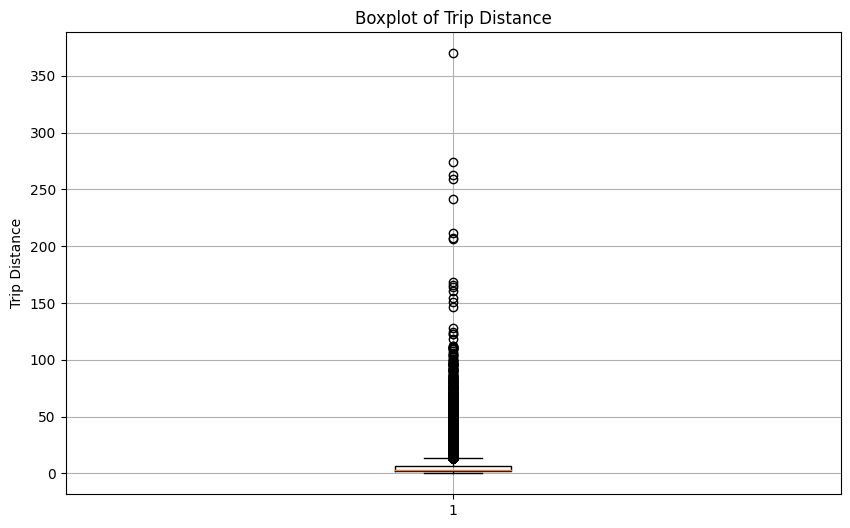

In [ ]:
# Check the outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df1['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.ylabel('Trip Distance')
plt.grid(True)  # Optional: to add a grid for better readability
plt.show()

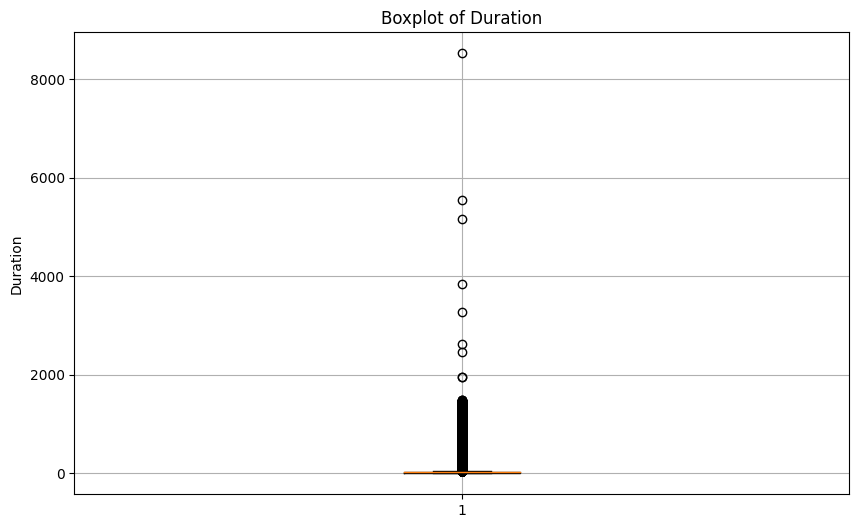

In [ ]:
# Check the outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df1['duration'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

In [ ]:
# Remove Outlier using IQR Method. Becouse my data is not nurmal ditributed
for col in ['trip_distance','fare_amount','duration']:

  q1 = df1[col].quantile(0.25) # formula is (Q1 = 25%)
  q3 = df1[col].quantile(0.75) # formula is (Q3 = 75%)

  iqr = q3-q1 # Formula of IQR = Q3-Q1

  lower_band = q1-1.5*iqr # Lower band = Q1-1.5*IQR
  upper_band = q3+1.5*iqr # Upper band = Q3 + 1.5*IQR

  df1 = df1[(df1[col]>=lower_band)&(df1[col]<=upper_band)] # Filter the data

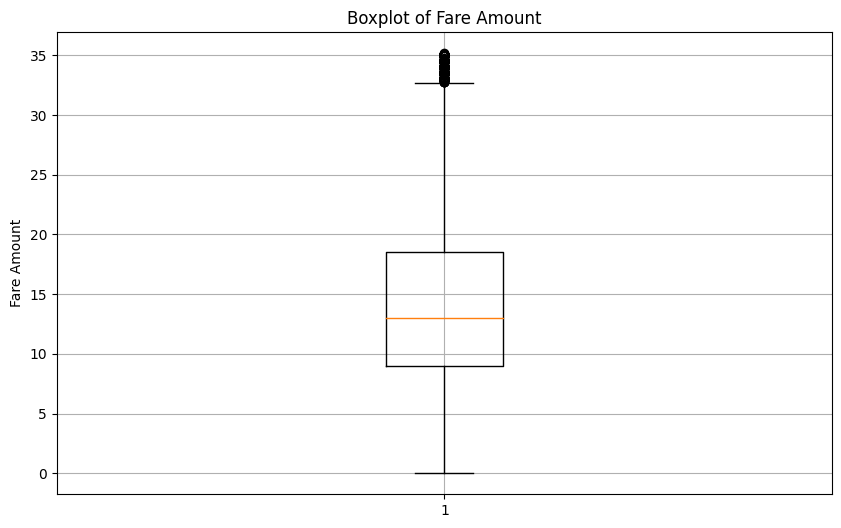

In [ ]:
# After Haldle outlier using IQR method check outlier

plt.figure(figsize=(10, 6))
plt.boxplot(df1['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount')
plt.grid(True)  # Optional: to add a grid for better readability
plt.show()

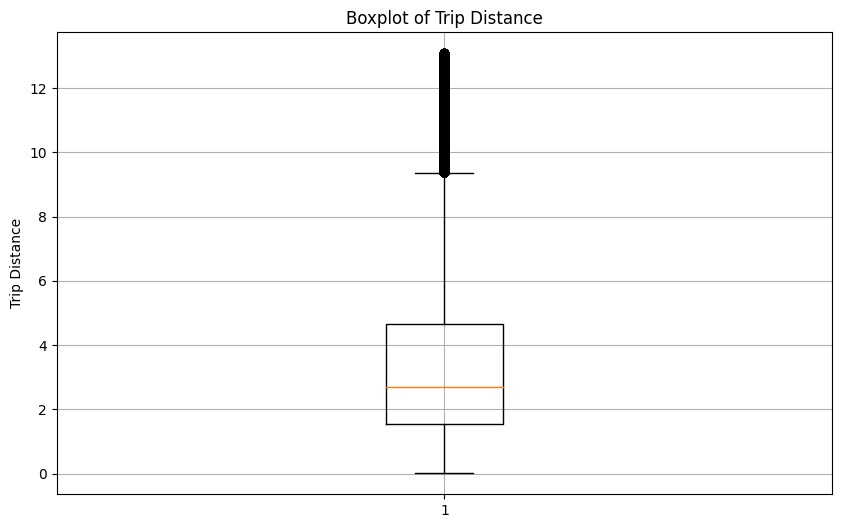

In [ ]:
# After Haldle outlier using IQR method check outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df1['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.ylabel('Trip Distance')
plt.grid(True)  # Optional: to add a grid for better readability
plt.show()

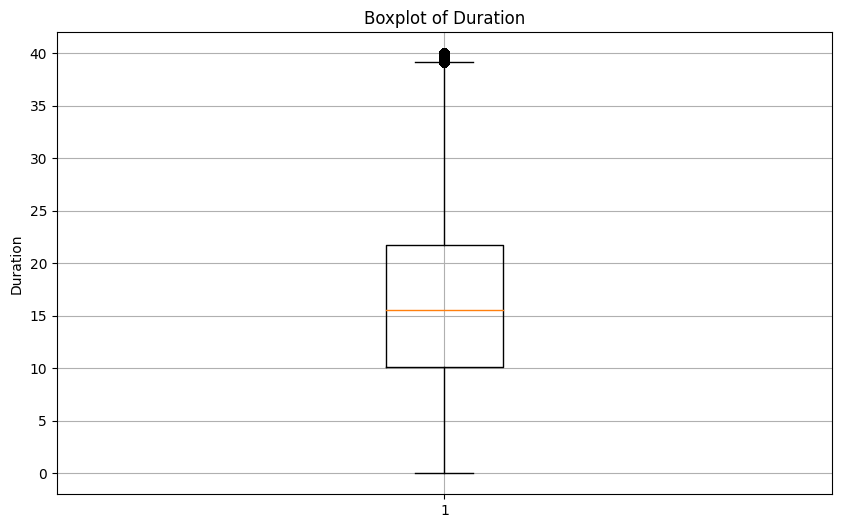

In [ ]:
# After Haldle outlier using IQR method check outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df1['duration'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

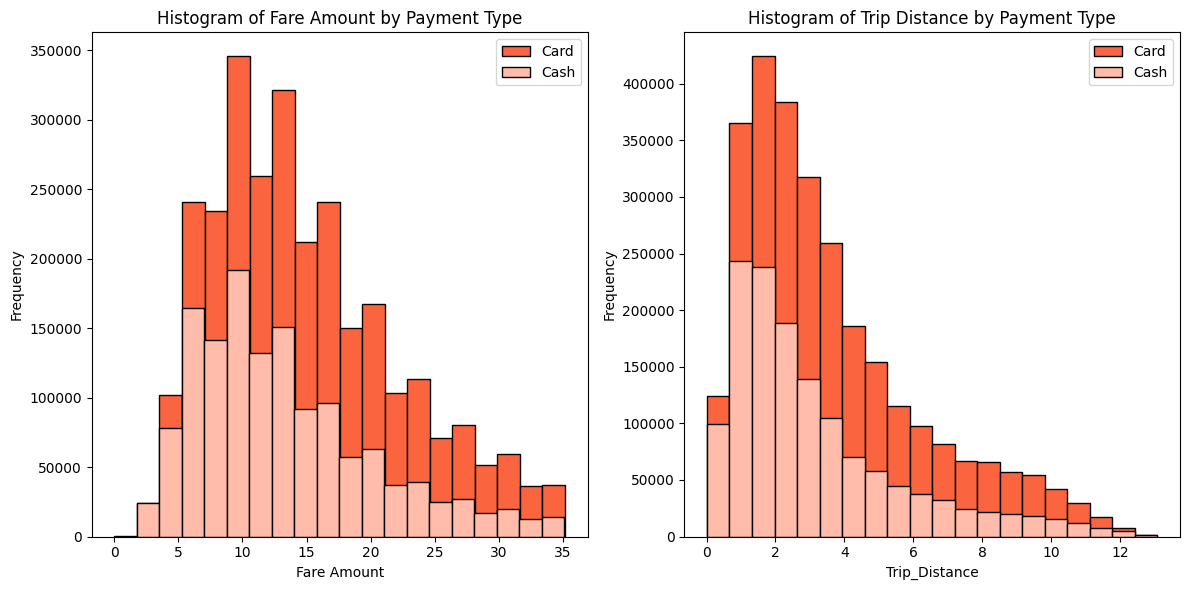

In [ ]:
# Relation Between Payment Mode & Trip Distance
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.hist(df1[df1['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color='#FA643F', label='Card')
plt.hist(df1[df1['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color='#FFBCAB', label='Cash')
plt.legend()
plt.title('Histogram of Fare Amount by Payment Type')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust the layout to make room for the labels and title


plt.subplot(1,2,2)
plt.hist(df1[df1['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color='#FA643F', label='Card')
plt.hist(df1[df1['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color='#FFBCAB', label='Cash')
plt.legend()
plt.title('Histogram of Trip Distance by Payment Type')
plt.xlabel('Trip_Distance')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust the layout to make room for the labels and title


In [ ]:
# Find payment type vs fare amount
df1.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.962930  7.217998      3.623423  2.606783
Cash           13.304176  6.938226      3.136949  2.521857

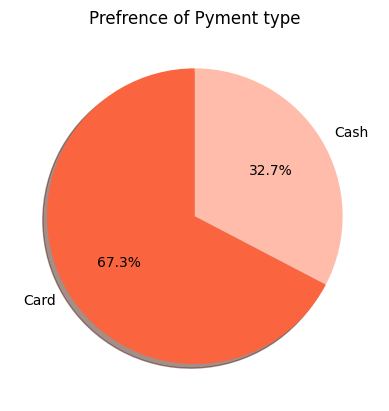

In [ ]:
# Create the Pie chart using Payment Type
plt.title('Prefrence of Pyment type')
data = df1['payment_type'].value_counts(normalize=True)
labels = df1['payment_type'].value_counts().index

# Create the pie chart
plt.pie(data,
        labels=labels,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',
        colors=['#FA643F','#FFBCAB'])

# Display the pie chart
plt.show()

In [ ]:
# Relation Between Payment type vs Passenger count
passenger_count = df1.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1556065,36.756836
1,Card,2,571386,13.497085
2,Card,3,224224,5.296543
3,Card,4,121046,2.859307
4,Card,5,228906,5.407139
5,Card,6,149153,3.523241
6,Cash,1,794221,18.760817
7,Cash,2,276885,6.540483
8,Cash,3,101977,2.408866
9,Cash,4,61138,1.444181


In [ ]:
df1 = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
df1['payment_type'] = ['Card', 'Cash']
df1.iloc[0, 1:] = passenger_count.iloc[0:5, -1].values
df1.iloc[1, 1:] = passenger_count.iloc[5:10, -1].values
df1

,payment_type,1,2,3,4,5
0,Card,36.756836,13.497085,5.296543,2.859307,5.407139
1,Cash,3.523241,18.760817,6.540483,2.408866,1.444181


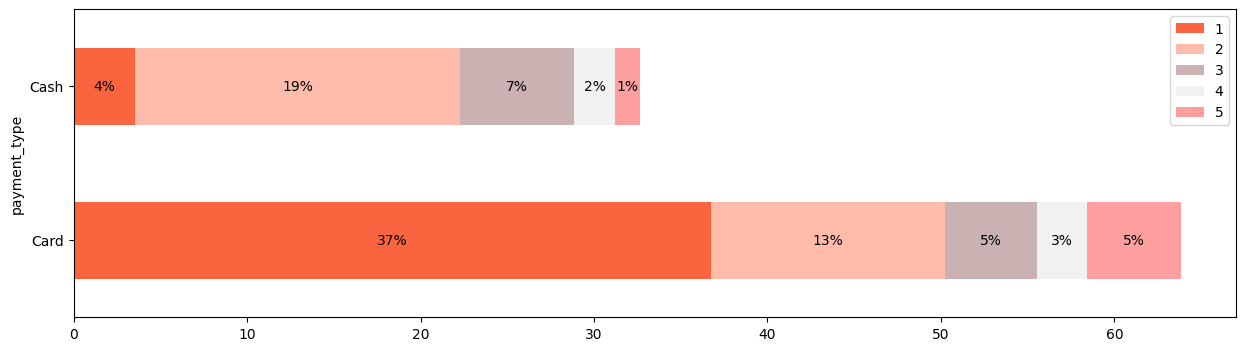

In [ ]:
# show the details using bar chart in percentage form
fig, ax = plt.subplots(figsize=(15, 4))

# Plot the data
df1.plot(x='payment_type',kind='barh', stacked=True, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax=ax)

# Annotate the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(width), horizontalalignment='center', verticalalignment='center')



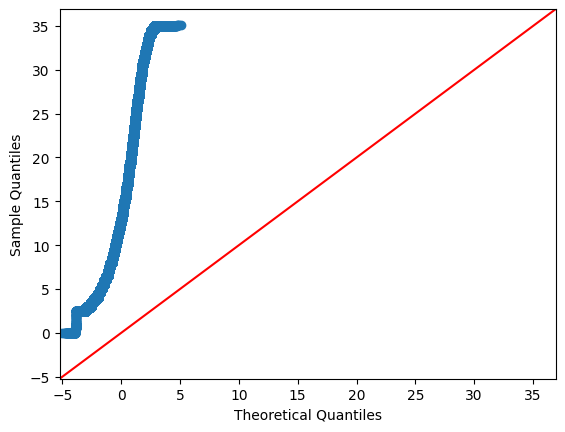

In [ ]:
# Create the QQplot
sm.qqplot(df1['fare_amount'], line='45')
plt.show()

In [ ]:
# Check the T test
card_sample = df1[df1['payment_type'] == 'Card']['fare_amount']
cash_sample = df1[df1['payment_type'] == 'Cash']['fare_amount']

In [ ]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var=False)

print('T stats: ', t_stats, 'p_values: ', p_value)

T stats:  227.64845129171266 p_values:  0.0
